## Gradio Pets

In [1]:
! pip install -Uq fastcore
! pip install -Uq fastai "timm==0.6.13" huggingface_hub

In [2]:
import timm

In [3]:
from fastai.vision.all import *

In [4]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), 
    valid_pct=0.2, 
    seed=42,
    label_func=RegexLabeller(pat = r'^([^/]+)_\d+'),
    item_tfms=Resize(224)
    )

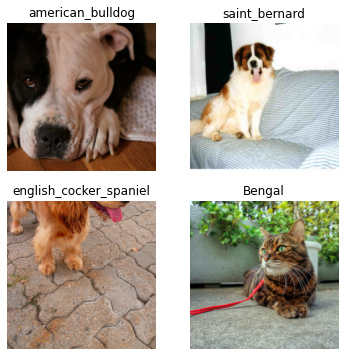

In [7]:
dls.show_batch(max_n=4)

In [8]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(3)

We could try a better model, based on [this analysis](https://www.kaggle.com/code/jhoward/which-image-models-are-best/). The convnext models work great!

In [9]:
timm.list_models('convnext*')

['convnext_atto',
 'convnext_atto_ols',
 'convnext_base',
 'convnext_base_384_in22ft1k',
 'convnext_base_in22ft1k',
 'convnext_base_in22k',
 'convnext_femto',
 'convnext_femto_ols',
 'convnext_large',
 'convnext_large_384_in22ft1k',
 'convnext_large_in22ft1k',
 'convnext_large_in22k',
 'convnext_nano',
 'convnext_nano_ols',
 'convnext_pico',
 'convnext_pico_ols',
 'convnext_small',
 'convnext_small_384_in22ft1k',
 'convnext_small_in22ft1k',
 'convnext_small_in22k',
 'convnext_tiny',
 'convnext_tiny_384_in22ft1k',
 'convnext_tiny_hnf',
 'convnext_tiny_in22ft1k',
 'convnext_tiny_in22k',
 'convnext_xlarge_384_in22ft1k',
 'convnext_xlarge_in22ft1k',
 'convnext_xlarge_in22k']

In [10]:
learn = vision_learner(dls, 'convnext_tiny_in22k', metrics=error_rate).to_fp16()
learn.fine_tune(3)

In [11]:
learn.export('model.pkl')